# Problem 2.20

Check that the following transformation is canonical

\begin{alignat*}{2}
    x &= \frac{1}{\alpha}\Big(\sqrt{2P_1}\sin Q_1 + P_2\Big)\ , 
        &\qquad p_x &= \frac{\alpha}{2}\Big(\sqrt{2P_1}\cos Q_1 - Q_2\Big)\ ,\\
    y &= \frac{1}{\alpha}\Big(\sqrt{2P_1}\cos Q_1 + Q_2\Big)\ ,
        &\qquad p_y &= -\frac{\alpha}{2}\Big(\sqrt{2P_1}\sin Q_1 - P_2\Big)\ .
\end{alignat*}

In [1]:
import hvr_functions as hvr
from sympy import *
from IPython.display import display
from sympy.physics.vector import dynamicsymbols, init_vprinting

init_vprinting()

In [2]:
t = symbols('t')
a, m, B, q, h = symbols('alpha m B q H')
x, y, z, px, py, pz = dynamicsymbols('x y z p_x p_y p_z')
q1, q2, p1, p2 = dynamicsymbols('Q_1 Q_2 P_1 P_2')
Ax, Ay, Az = dynamicsymbols('A_x A_y A_z')

Define the transformation

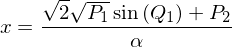

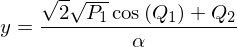

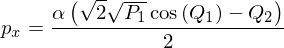

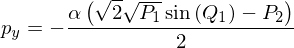

In [3]:
vars1 = [x, y, px, py]
vars2 = [q1, q2, p1, p2]

change_vars = {x  : (sqrt(2*p1)*sin(q1)+p2)/a, \
               y  : (sqrt(2*p1)*cos(q1)+q2)/a, \
               px : a/2*(sqrt(2*p1)*cos(q1)-q2), \
               py : -a/2*(sqrt(2*p1)*sin(q1)-p2)}

for key in change_vars:
    display( Eq(key, change_vars[key]) )

Check that it is indeed canonical (I use my own function here, you can try to code it or check every Poisson bracket manually)

In [4]:
hvr.check_symplectic(change_vars, vars2, vars1)

True

Apply it to the hamiltonian of a particle in a constant magnetic field. For a magnetic field pointing in the $\hat{z}$ direction we have

\begin{equation}
    B = \partial_xA_y - \partial_y A_x
\end{equation}

If it is constant a possible configuration (in some gauge) is

\begin{align}
    A_x &= -\frac{1}{2}y B\\
    A_y &= \frac{1}{2}x B
\end{align}

The hamiltonian for this problem is

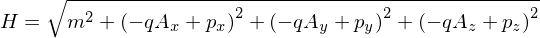

In [5]:
H = sqrt(m**2 + (px-q*Ax)**2 + (py-q*Ay)**2 + (pz-q*Az)**2)
display( Eq(h, H) )

And the electromagnetic field is

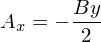

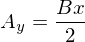

In [6]:
em_field = {Ax : -y*B/2, Ay : x*B/2, Az : 0}

for key in em_field:
    display( Eq(key, em_field[key]) )

Substituting in the hamiltonian

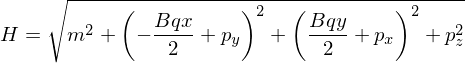

In [7]:
H = H.subs(em_field)
display( Eq(h, H) )

And performing the canonical transformation

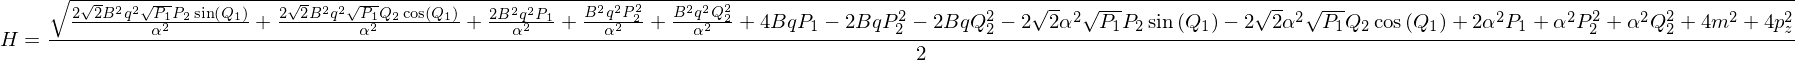

In [8]:
H = H.subs(change_vars)
H = H.expand().simplify()

display( Eq(h, H) )

Choosing the parameter $\alpha$ as

\begin{equation}
    \alpha^2 = qB\ ,\qquad qB > 0
\end{equation}

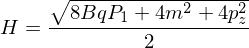

In [9]:
H = H.subs(a**2, B*q)

display( Eq(h, H) )

It is easy to find the equations of motion for this hamiltonian (I use a function of my own again, this one is very simple: try to do it as an exercise)

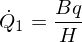

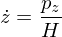

In [10]:
can_vars = [q1, q2, z, p1, p2, pz]
sys = hvr.eom_canonical(t, can_vars, H)

for eq in sys:
    display( eq.subs(2*H, 2*h) )   # NOTE: check what happens without the 2